In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load each forecast
a = pd.read_csv('Product_A_Forecast.csv')
b = pd.read_csv('Product_B_Forecast.csv')
c = pd.read_csv('Product_C_Forecast.csv')

b = b.rename(columns={"ds": "Date"})


In [ ]:
# Rename predicted sales columns
a.rename(columns={'PredictedSales': 'ProductA_Sales'}, inplace=True)
b.rename(columns={'PredictedSales': 'ProductB_Sales'}, inplace=True)
c.rename(columns={'PredictedSales': 'ProductC_Sales'}, inplace=True)

# Merge on Date
forecast_combined = a.merge(b, on='Date').merge(c, on='Date')

# Convert Date
forecast_combined['Date'] = pd.to_datetime(forecast_combined['Date'])

forecast_combined.head()

,Date,Price_x,review_count_x,avg_rating_x,avg_sentiment_x,Best Seller Rank_x,ProductA_Sales,Price_y,review_count_y,avg_rating_y,avg_sentiment_y,Best Seller Rank_y,ProductB_Sales,Price,review_count,avg_rating,avg_sentiment,Best Seller Rank,ProductC_Sales
0,2025-05-04,9.996787,-3.352822,1.848103,0.150717,1310.630514,0.014917,13.472946,-1.015047,1.122037,0.065377,7489.446843,0.000012,12.947762,-1.292223,1.968455,0.091445,792.735244,0.019200
1,2025-05-11,9.829595,3.400479,1.721870,0.140760,1286.414207,0.028323,13.179235,-1.537284,1.143106,0.151589,7348.008809,0.015995,14.105204,-0.671976,1.843588,0.132068,994.753458,0.010484
2,2025-05-18,9.615149,-0.080024,1.771831,0.220209,1313.106852,0.032247,14.147487,-0.530641,1.143468,0.079954,7501.556640,0.009082,14.246360,-4.331968,1.885888,0.126337,826.509197,0.010128
3,2025-05-25,10.030440,-1.625841,1.821203,0.150945,1272.764977,0.014917,12.600214,-1.687047,1.078305,0.088756,7571.338795,0.008706,12.961350,0.049867,2.098209,0.165438,1016.951817,0.010967
4,2025-06-01,9.779444,-0.531703,2.027957,0.139277,1193.051262,0.015196,13.524278,0.559295,1.075256,0.068430,7636.730895,0.000012,12.424445,2.372395,2.120788,0.099436,764.249378,0.020034


<ipython-input-7-f337df4e1386>:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


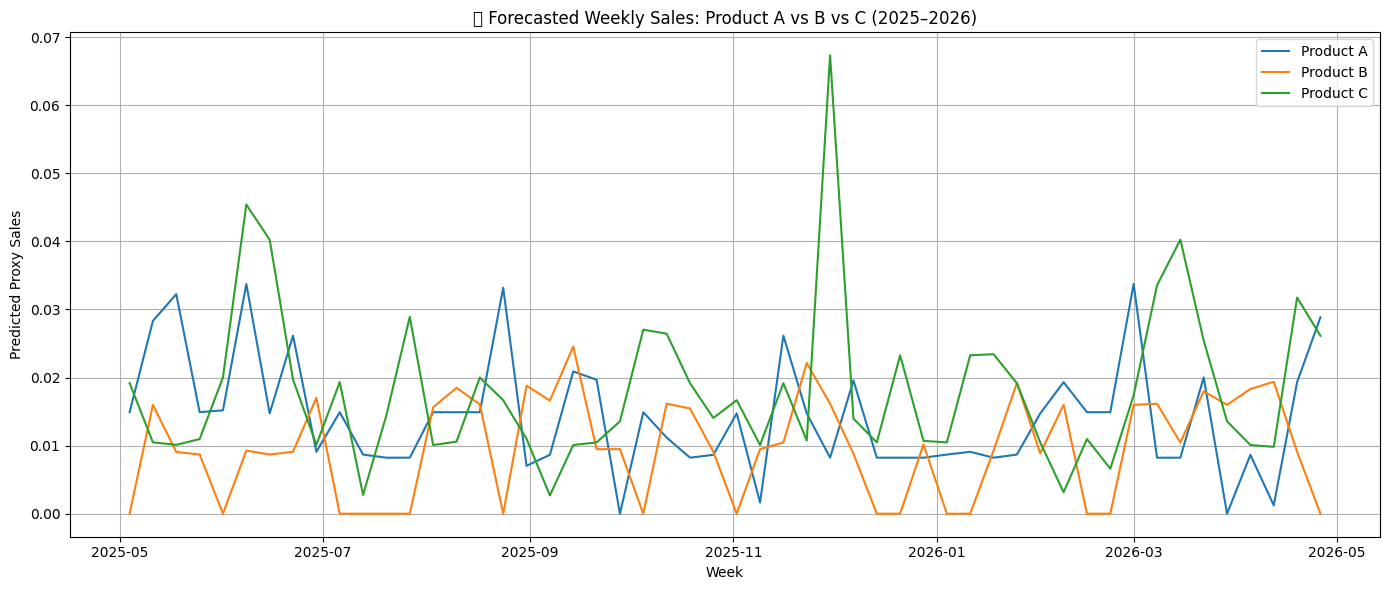

In [ ]:
# ✅ Clip negative proxy sales to zero for all products
forecast_combined['ProductA_Sales'] = forecast_combined['ProductA_Sales'].clip(lower=0)
forecast_combined['ProductB_Sales'] = forecast_combined['ProductB_Sales'].clip(lower=0)
forecast_combined['ProductC_Sales'] = forecast_combined['ProductC_Sales'].clip(lower=0)

# 📊 Plot the cleaned forecast
plt.figure(figsize=(14,6))
plt.plot(forecast_combined['Date'], forecast_combined['ProductA_Sales'], label='Product A', )
plt.plot(forecast_combined['Date'], forecast_combined['ProductB_Sales'], label='Product B', )
plt.plot(forecast_combined['Date'], forecast_combined['ProductC_Sales'], label='Product C', )

plt.title('📈 Forecasted Weekly Sales: Product A vs B vs C (2025–2026)')
plt.xlabel('Week')
plt.ylabel('Predicted Proxy Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-10-730183bae2d8>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


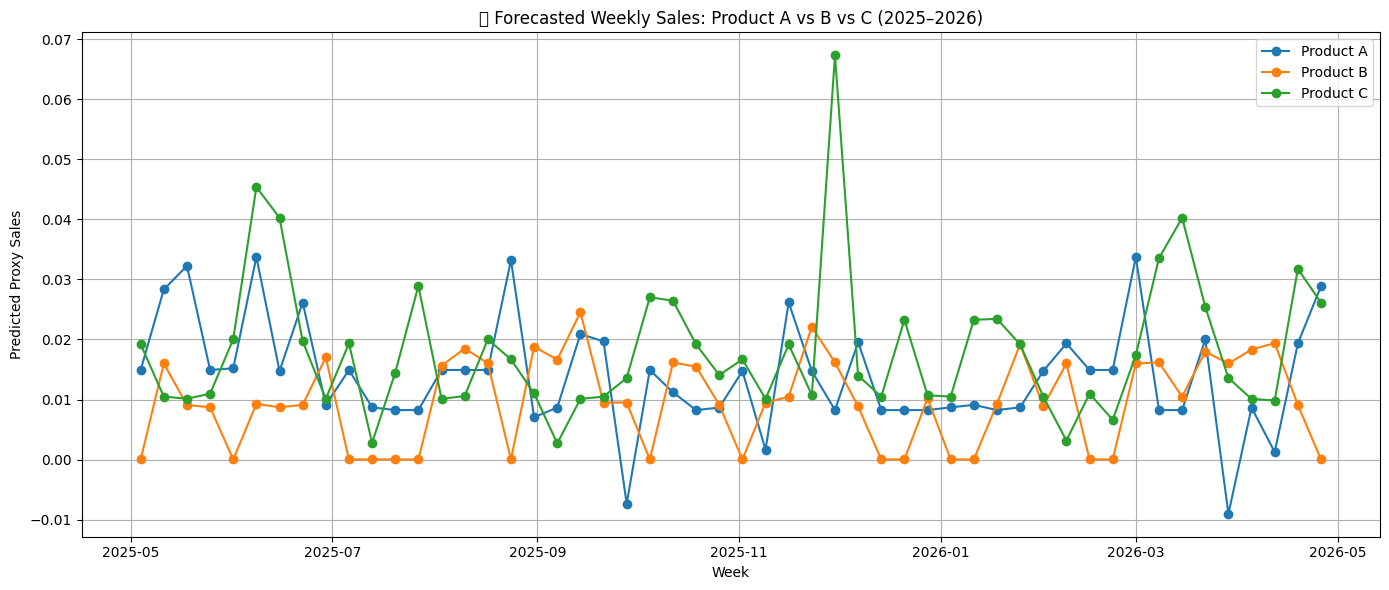

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(forecast_combined['Date'], forecast_combined['ProductA_Sales'], label='Product A', marker='o')
plt.plot(forecast_combined['Date'], forecast_combined['ProductB_Sales'], label='Product B', marker='o')
plt.plot(forecast_combined['Date'], forecast_combined['ProductC_Sales'], label='Product C', marker='o')

plt.title('📈 Forecasted Weekly Sales: Product A vs B vs C (2025–2026)')
plt.xlabel('Week')
plt.ylabel('Predicted Proxy Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(forecast_combined['Date'], forecast_combined['EstimatedUnits'], marker='o')
plt.title('Estimated Weekly Units Sold - Type A Sunscreen')
plt.ylabel('Estimated Units')

forecast_combined['TrendLine'] = forecast_combined['ProductA_Sales'].rolling(window=4, min_periods=1).mean()
plt.plot(weekly_combined['Date'], weekly_combined['TrendLine'], label='4-Week Avg', color='orange', linewidth=2)
plt.legend()

KeyError: 'EstimatedUnits'

<ipython-input-13-a3a34b565986>:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


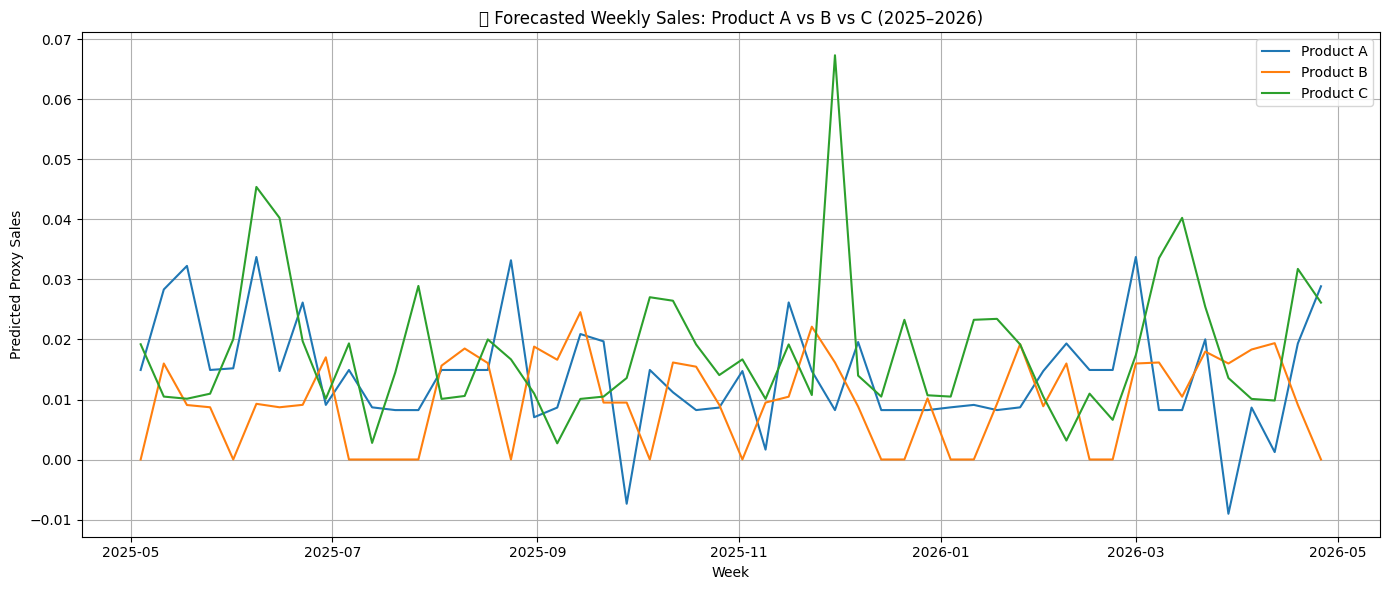

In [ ]:
plt.figure(figsize=(14,6))
forecast_combined['TrendLineA'] = forecast_combined['ProductA_Sales'].rolling(window=1, min_periods=1).mean()
forecast_combined['TrendLineB'] = forecast_combined['ProductB_Sales'].rolling(window=1, min_periods=1).mean()
forecast_combined['TrendLineC'] = forecast_combined['ProductC_Sales'].rolling(window=1, min_periods=1).mean()
plt.plot(forecast_combined['Date'], forecast_combined['TrendLineA'], label='Product A', )
plt.plot(forecast_combined['Date'], forecast_combined['TrendLineB'], label='Product B', )
plt.plot(forecast_combined['Date'], forecast_combined['TrendLineC'], label='Product C', )
plt.title('📈 Forecasted Weekly Sales: Product A vs B vs C (2025–2026)')
plt.xlabel('Week')
plt.ylabel('Predicted Proxy Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
total_sales = forecast_combined[['ProductA_Sales', 'ProductB_Sales', 'ProductC_Sales']].sum().sort_values()

print("🔵 Total Predicted Sales from May 2025 to May 2026:")
print(total_sales)

🔵 Total Predicted Sales from May 2025 to May 2026:
ProductB_Sales    0.502031
ProductA_Sales    0.743400
ProductC_Sales    0.941821
dtype: float64


In [ ]:


# Function to extract metrics
def extract_review_metrics(df, product_name="Product"):
    print(f"📊 Metrics for {product_name}")

    # 1. Total number of reviews
    total_reviews = df.shape[0]

    # 2. Average rating
    avg_rating = df['Rating'].mean()

    # 3. % of positive ratings (>3)
    positive_reviews = (df['Rating'] > 3).sum()
    positive_pct = (positive_reviews / total_reviews) * 100

    # 4. 6-Month average rating
    df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])  # ensure ReviewDate is datetime
    latest_date = df['ReviewDate'].max()
    six_months_ago = latest_date - pd.DateOffset(months=6)
    df_last_6m = df[df['ReviewDate'] >= six_months_ago]
    avg_rating_6m = df_last_6m['Rating'].mean()

    # Print the results
    print(f"Total Reviews: {total_reviews}")
    print(f"Average Rating: {avg_rating:.2f}")
    print(f"% Positive Reviews (>3 stars): {positive_pct:.2f}%")
    print(f"6-Month Average Rating: {avg_rating_6m:.2f}")
    print("-" * 50)

In [ ]:
TypeA_Cleaned_Review = pd.read_csv('FINAL_TypeA_cleaned_reviews.csv')
TypeB_Cleaned_Review = pd.read_csv('TypeB_Cleaned_Reviews.csv')
TypeC_Cleaned_Review = pd.read_csv('TypeC_cleaned_reviews.csv')

In [ ]:
TypeB_Cleaned_Review.head()

,id,profileName,text,date,title,rating,helpful
0,R1UEFJ9W0XHIL3,Kaley Ariel,"Definitely a great way to apply sunblock, no m...",2022-01-08,EASY to carry and apply!,4.0,0
1,R3V7UHQRTOHAU1,🌟 Emma Elizabeth 🌟,"This stick sunscreen is easy to apply, absorbs...",2022-01-13,Great!,4.0,0
2,R2V83R306RQQSB,Jane Doe,I have insanely sensitive skin. I burn through...,2022-01-16,Love that it doesn’t irritate my skin,4.0,0
3,R4U1MRHUY5G1T,K. Chan,Neutrogena Mineral Ultra Sheer Dry-Touch Face ...,2022-01-20,An Effortless And Easy Way To Keep Yourself Sa...,4.0,0
4,R3MW0UI1J5GQEX,Craig Stone,Liked the old one with no zinc that left no wh...,2022-02-04,Leaves white residue due to the zinc,2.0,0


In [ ]:
TypeC_Cleaned_Review.head()

,profileName,text,date,title,rating,helpful,cleaned_tokens,cleaned_text
0,jorg_2029,Updated review:This sunscreen still works very...,2022-02-03,UPDATE: runs into eyes and burns a bit,3.0,0,"['updat', 'sunscreen', 'still', 'work', 'veri'...",updat sunscreen still work veri well - experie...
1,Michelle,I was hoping this sunscreen would be the perfe...,2022-04-07,Does not perform well under makeup,3.0,2,"['hope', 'sunscreen', 'would', 'the', 'perfect...",hope sunscreen would the perfect sunscreen wea...
2,Hcopej,I’ve used the UltraSheer face stick for years ...,2022-04-11,Ow! Stinging eyes,2.0,6,"['give', 'use', 'the', 'face', 'stick', 'year'...",give use the face stick year love discontinu l...
3,Heidema,This product works great as sunscreen and does...,2022-04-13,"Works decent as sunscreen, not so great under ...",4.0,2,"['product', 'work', 'great', 'sunscreen', 'lea...",product work great sunscreen leav face feel dr...
4,DGR,Leaves a strange oily finish and doesn’t Absor...,2022-04-18,Oily finish,3.0,0,"['leaf', 'strang', 'oili', 'finish', 'absorb']",leaf strang oili finish absorb


In [ ]:
TypeB_Cleaned_Review = TypeB_Cleaned_Review.rename(columns={"Ratings": "Rating"})

In [ ]:
TypeB_Cleaned_Review = TypeB_Cleaned_Review.rename(columns={"date": "ReviewDate"})

In [ ]:
TypeC_Cleaned_Review = TypeC_Cleaned_Review.rename(columns={"rating": "Rating"})
TypeC_Cleaned_Review = TypeC_Cleaned_Review.rename(columns={"date": "ReviewDate"})

In [ ]:
extract_review_metrics(TypeA_Cleaned_Review, "Product A")
extract_review_metrics(TypeB_Cleaned_Review, "Product B")
extract_review_metrics(TypeC_Cleaned_Review, "Product C")

📊 Metrics for Product A
Total Reviews: 420
Average Rating: 3.16
% Positive Reviews (>3 stars): 47.86%
6-Month Average Rating: 3.87
--------------------------------------------------
📊 Metrics for Product B


KeyError: 'Rating'